<a href="https://colab.research.google.com/github/Saultr21/IA-Y-BIGDATA/blob/main/SNS/SNS_ACT3_2/Actividad_3_2_%E2%80%93_Comparativa_clasificadores_NaiveBayes_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Saúl Trujillo Rodríguez**




# Dataset de Iris

In [ ]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB, CategoricalNB
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

# Dividir en conjunto de entrenamiento y prueba
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

# Transformar ytrain y ytest a valores numéricos (ya están como números en este caso)
ytrain_num = pd.Series(ytrain, dtype=int)
ytest_num = pd.Series(ytest, dtype=int)

# clasificadores
names = ["GaussianNB", "MultiNomialNB", "BernouilliNB", "ComplementNB", "CategoricalNB"]
classifiers = [GaussianNB(), MultinomialNB(), BernoulliNB(), ComplementNB(), CategoricalNB()]

for name, clf in zip(names, classifiers):
    if name in ["MultinomialNB", "BernoulliNB", "ComplementNB", "CategoricalNB"]:
        # Usar las características originales sin modificación
        clf.fit(Xtrain, ytrain_num)
        y_pred = clf.predict(Xtest)
    else:
        # Usar las características sin modificar para GaussianNB
        clf.fit(Xtrain, ytrain_num)
        y_pred = clf.predict(Xtest)

    # PREDICT AND SCORE
    score = accuracy_score(ytest_num, y_pred)
    print(f"Modelo: {name} = {score:.2f}")


Modelo: GaussianNB = 0.98
Modelo: MultiNomialNB = 0.96
Modelo: BernouilliNB = 0.29
Modelo: ComplementNB = 0.71
Modelo: CategoricalNB = 0.96


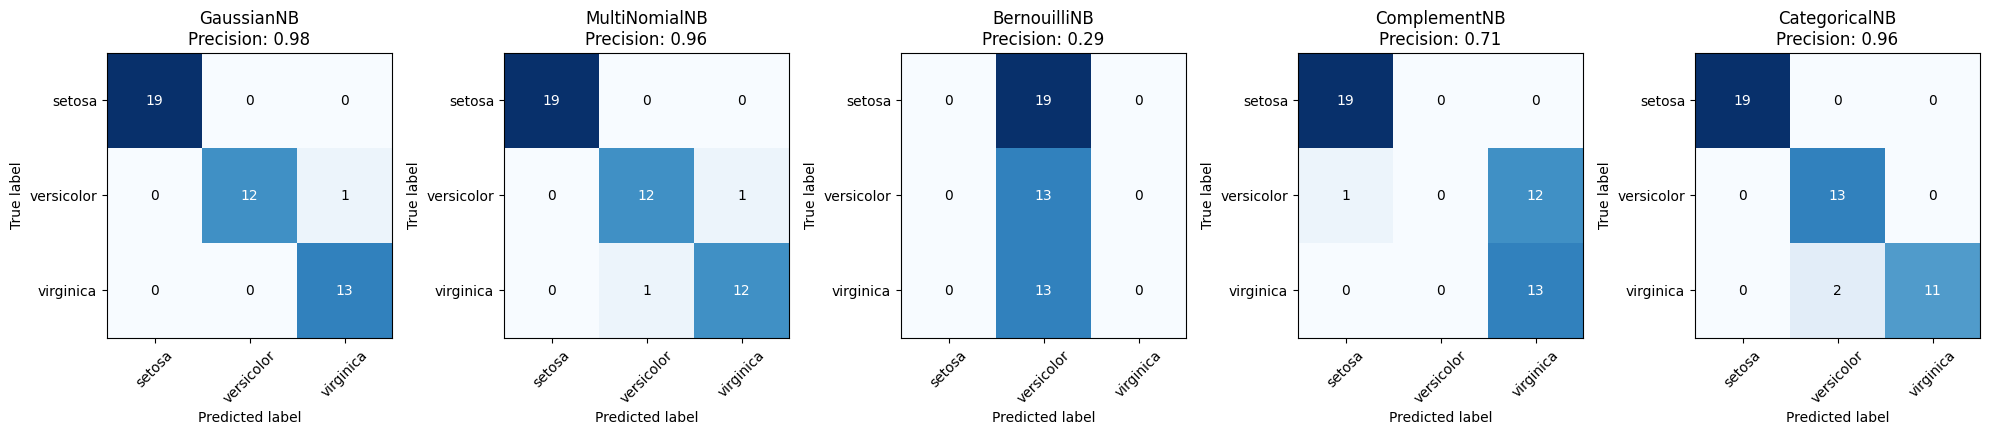

In [ ]:
def plot_confusion_matrix(cm, classes, score, title='Confusion matrix', cmap=plt.cm.Blues, ax=None):
    if ax is None:
        ax = plt.gca()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(f"{title}\nPrecision: {score:.2f}")
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes, rotation=45)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    return im
# Initialize plot
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
axes = axes.ravel()
for idx, (name, clf) in enumerate(zip(names, classifiers)):
    # Handle compatibility of data for certain classifiers
    if name in ["MultinomialNB", "BernoulliNB", "ComplementNB"]:
        # Scale the data to [0, 1] range
        scaler = MinMaxScaler()  # Scale values between 0 and 1
        Xtrain_non_neg = scaler.fit_transform(Xtrain)
        Xtest_non_neg = scaler.transform(Xtest)
        # For BernoulliNB and MultinomialNB, discretize the features (make them integers)
        if name == "BernoulliNB":
            Xtrain_non_neg = np.where(Xtrain_non_neg > 0.5, 1, 0)  # Convert to binary features
            Xtest_non_neg = np.where(Xtest_non_neg > 0.5, 1, 0)  # Convert to binary features
        elif name == "MultinomialNB":
            Xtrain_non_neg = np.round(Xtrain_non_neg)  # Round to integers
            Xtest_non_neg = np.round(Xtest_non_neg)  # Round to integers
    else:
        Xtrain_non_neg, Xtest_non_neg = Xtrain, Xtest
    # Fit the model
    clf.fit(Xtrain_non_neg, ytrain_num)
    # Predict and score
    y_pred = clf.predict(Xtest_non_neg)
    score = accuracy_score(ytest_num, y_pred)  # Mean accuracy on the test data
    # Compute confusion matrix
    cm = confusion_matrix(ytest_num, y_pred)
    # Plot confusion matrix
    plot_confusion_matrix(cm, classes=['setosa', 'versicolor', 'virginica'],
                          score=score,
                          title=f'{name}',
                          cmap=plt.cm.Blues, ax=axes[idx])
# Hide any unused subplot axes
for ax in axes[len(names):]:
    ax.axis('off')
plt.tight_layout()
plt.show()

# Dataset de Penguin

In [89]:
import seaborn as sns
penguins = sns.load_dataset('penguins')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [90]:
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB, CategoricalNB
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Codificar las características categóricas
categorical_cols = ['island', 'sex']
penguins[categorical_cols] = penguins[categorical_cols].apply(LabelEncoder().fit_transform)
# Separar características y etiquetas
X = penguins.drop(columns=['species'])
y = penguins['species']
# Manejar valores faltantes en las características
imputer = SimpleImputer(strategy="mean")  # Imputar con la media
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
# Dividir en conjunto de entrenamiento y prueba
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)
# Transformar ytrain y ytest a valores numéricos
ytrain_num = pd.Series(ytrain.replace(['Adelie', 'Chinstrap', 'Gentoo'], [0, 1, 2]).to_numpy(), dtype=int)
ytest_num = pd.Series(ytest.replace(['Adelie', 'Chinstrap', 'Gentoo'], [0, 1, 2]).to_numpy(), dtype=int)
# classifiers
names = ["GaussianNB", "MultiNomialNB", "BernouilliNB", "ComplementNB", "CategoricalNB"]
classifiers = [GaussianNB(), MultinomialNB(), BernoulliNB(), ComplementNB(), CategoricalNB()]

for name, clf in zip(names, classifiers):
    # Handle compatibility of data for certain classifiers
    if name in ["MultiNomialNB", "BernouilliNB", "ComplementNB"]:
        # Ensure input features are non-negative
        Xtrain_non_neg = Xtrain - Xtrain.min()
        Xtest_non_neg = Xtest - Xtest.min()
    else:
        Xtrain_non_neg, Xtest_non_neg = Xtrain, Xtest

    # FIT THE MODEL
    clf.fit(Xtrain_non_neg, ytrain_num)
    # PREDICT AND SCORE
    score = clf.score(Xtest_non_neg, ytest_num)  # Returns the mean accuracy on the given test data and labels.
    print("Modelo: %s = %6.2f" % (name, score))

Modelo: GaussianNB =   0.98
Modelo: MultiNomialNB =   0.94
Modelo: BernouilliNB =   0.66
Modelo: ComplementNB =   0.87
Modelo: CategoricalNB =   0.93


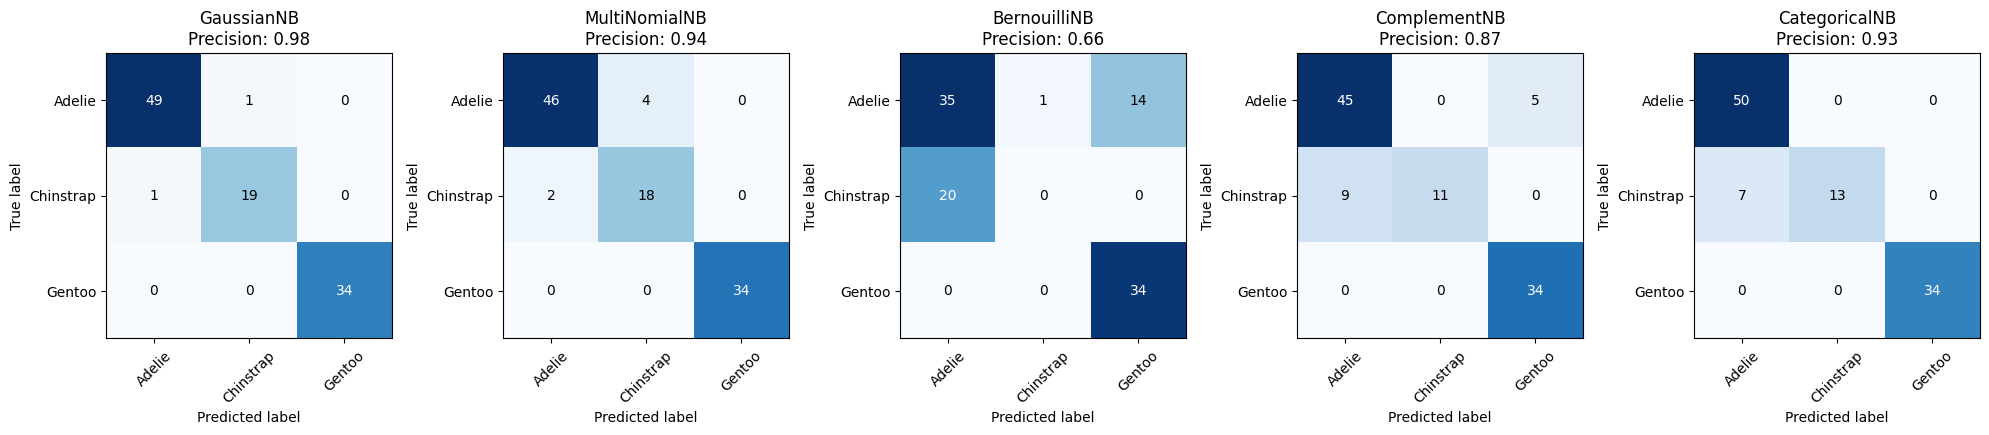

In [91]:
# Define a function to plot confusion matrix
def plot_confusion_matrix(cm, classes, score, title='Confusion matrix', cmap=plt.cm.Blues, ax=None):
    if ax is None:
        ax = plt.gca()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(f"{title}\nPrecision: {score:.2f}")
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes, rotation=45)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    return im
# Initialize plot
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
axes = axes.ravel()
for idx, (name, clf) in enumerate(zip(names, classifiers)):
    # Handle compatibility of data for certain classifiers
    if name in ["MultiNomialNB", "BernouilliNB", "ComplementNB"]:
        # Ensure input features are non-negative
        Xtrain_non_neg = Xtrain - Xtrain.min()
        Xtest_non_neg = Xtest - Xtest.min()
    else:
        Xtrain_non_neg, Xtest_non_neg = Xtrain, Xtest

    # FIT THE MODEL
    clf.fit(Xtrain_non_neg, ytrain_num)

    # PREDICT AND SCORE
    y_pred = clf.predict(Xtest_non_neg)
    score = clf.score(Xtest_non_neg, ytest_num)  # Mean accuracy on the test data
    # COMPUTE CONFUSION MATRIX
    cm = confusion_matrix(ytest_num, y_pred)
    # PLOT CONFUSION MATRIX
    plot_confusion_matrix(cm, classes=['Adelie', 'Chinstrap', 'Gentoo'],
                          score=score,
                          title=f'{name}',
                          cmap=plt.cm.Blues, ax=axes[idx])

plt.tight_layout()
plt.show()